## Skewness

1. 偏度是通过平均数和中位数的差异来衡量的，众数通常与偏度的判断关系较小。

2. Positive skewness (right-skewed): Mean通常受较大值的影响向右偏移. mean > median; Skewness value is > 0

3. Negative skewness (left): Mean通常受较大值的影响向左偏移. mean < median; Skewness value is < 0

4. Zero skewness (symmetrical): Normally distributed; Skewness value is around or equal to 0

5. uniformly distributed: mean == median


## Kurtosis

1. Leptokurtic (High kurtosis): Kurtosis value > 3

2. Platykurtic (Low kurtosis) : Kurtosis value < 3

3. Mesokurtic (Normal kurtosis): Kurtosis value around 3


## Standard deviation && Variance


In [1]:
import numpy as np
import matplotlib.pyplot as plt

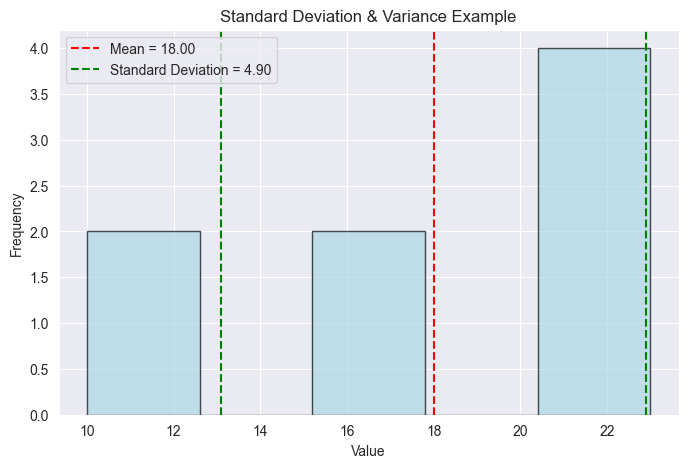

In [2]:
data = np.array([10, 12, 23, 23, 16, 23, 21, 16])

variance = np.var(data)
std_deviation = np.std(data)

plt.figure(figsize=(8, 5))
plt.hist(data, bins=5, color='lightblue', edgecolor='black', alpha=0.7)

plt.axvline(np.mean(data), color='red', linestyle='--', label=f'Mean = {np.mean(data):.2f}')
plt.axvline(np.mean(data) + std_deviation, color='green', linestyle='--', label=f'Standard Deviation = {std_deviation:.2f}')
plt.axvline(np.mean(data) - std_deviation, color='green', linestyle='--')

plt.title('Standard Deviation & Variance Example')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.legend()
plt.show()

In [3]:
variance, std_deviation

(np.float64(24.0), np.float64(4.898979485566356))

## Correlation efficient && Covariance

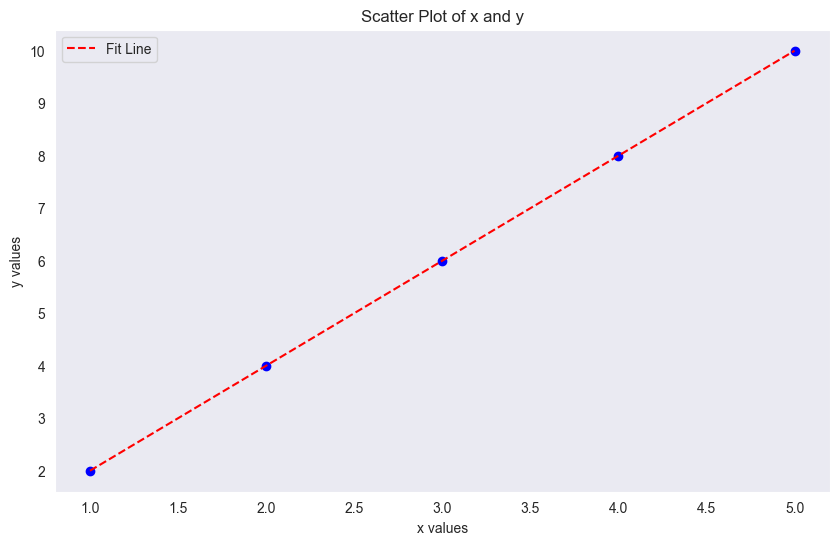

In [4]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

covariance = np.cov(x, y)[0, 1]  # 取协方差矩阵中的相应值
correlation_coefficient = np.corrcoef(x, y)[0, 1]  # 取相关系数矩阵中的相应值

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', marker='o')

plt.title('Scatter Plot of x and y')
plt.xlabel('x values')
plt.ylabel('y values')

# 拟合直线
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', linestyle='--', label='Fit Line')

plt.legend()
plt.grid()
plt.show()

In [5]:
covariance, correlation_coefficient

(np.float64(5.0), np.float64(0.9999999999999999))

## Hypothesis testing

1. **提出假设**：
   - **原假设（Null Hypothesis, \(H_0\)**）**：通常是假设没有差异或效应。比如“这个药物没有效果”。
   - **备择假设（Alternative Hypothesis, \(H_1\)**）**：与原假设相对的假设，通常是表示存在差异或效应。比如“这个药物有效”。

2. **选择检验标准**：
   - 设定一个显著性水平（\(\alpha\)），常用值是0.05。这表示在原假设为真的情况下，有5%的概率会错误地拒绝原假设。

3. **计算检验统计量**：
   - 根据样本数据计算出统计量（如t值或z值），用于衡量样本数据与原假设的差异程度。

4. **作出决策**：
   - 根据统计量计算出p值。**p值**表示在原假设成立的前提下，得到现有样本数据或更极端数据的概率。
   - 如果 **p值 ≤ 显著性水平（\(\alpha\)**）**，拒绝原假设，支持备择假设。
   - 如果 **p值 > 显著性水平**，则无法拒绝原假设。

5. **分析**
   - Type I Error (False positive)：拒绝了真实的原假设，假阳性。
   - Type II Error (False negative)：未拒绝错误的原假设，假阴性。 

如何平衡：
1. **降低 Type I 错误**：
   - 降低显著性水平（\(\alpha\)）可以减少第一类错误的概率。但这样会增加第二类错误（Type II Error）的可能性，因为我们更加严格地拒绝原假设，导致未能发现真正效应的几率变高。

2. **降低 Type II 错误**：
   - 提高统计功效（\(1 - \beta\)）可以减少第二类错误的概率，这通常通过增加样本量或提高测试敏感度来实现。但提高功效也可能增加犯 Type I 错误的风险，因为更容易拒绝原假设。

实际中的权衡：
- **根据具体情况调整**：有时犯 Type I 错误的成本较高（例如，药物测试中误认为无效药物有效），研究者会选择较低的显著性水平。相反，如果未能发现真实效应的后果较严重（如错失某些关键发现），则可能希望减少 Type II 错误，增加功效。

总结：
**Type I 错误**和**Type II 错误**之间存在权衡关系，降低一个错误通常会增加另一个的风险。如何平衡两者取决于具体研究的目标和对错误后果的容忍度。


## Normality testing

Normality是指数据是否符合正态分布的特性。在统计学中，许多推断方法（如t检验、ANOVA等）都假设数据来自一个正态分布的总体，因此检验数据的正态性很重要。

正态分布的特点：
1. **钟形曲线**：正态分布的概率密度曲线呈钟形，对称，峰值在均值处。
2. **均值=中位数=众数**：正态分布的三个常用位置参数（均值、中位数和众数）相等，且都位于曲线的中心。
3. **分布对称**：数据点围绕中心对称分布，曲线两边的数据点分布相同。
4. **68-95-99.7 规则**：正态分布中，约68%的数据点位于均值的一个标准差内，95%位于两个标准差内，99.7%位于三个标准差内。

正态性的检验方法：
1. **绘制图形**：
   - **Q-Q 图（Quantile-Quantile Plot）**：用于可视化检验正态性，如果点大致落在一条直线上，说明数据接近正态分布。
   - **直方图**：检查数据的分布形状是否呈钟形。
   
2. **统计检验**：
   - **Shapiro-Wilk 检验**：一个常用的检验数据正态性的检验方法。p值较大（通常 > 0.05）则认为数据符合正态性。
   - **Kolmogorov-Smirnov 检验**：另一种检验正态性的统计方法。


WHY IS THE DATA NORMAL?
- BELL CURVE (WITH SOME OUTLIERS)
- KURTOSIS = 3.01, WHICH IS AROUND 3.0
- SKEWNESS = -0.03, WHICH IS AROUND 0.0


WHY IS THE DATA NOT NORMAL?
- BIMODAL DISTRIBUTION (TWO PEAKS)
